

# Project: TMDb Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  In this project, we will be analyzing a data set of over 10,000 movie titles to explore patterns within the data. This data set was taken from The Movie Database (TMDb). Each row corresponds to a movie title and inclues relevant data about each movie.
   * The following variables will be included in our analysis: 
           - popularity
           - revenue
           - director
           - voute count
           - revenue adj
           - release year
   * The two questions we will be exploring are: 
          1) Can we provide a list of the top 10 most popular directors based on ratings of high revenue movies?
          2) How is popularity of high revenue movies trending over time?

In [60]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [61]:

df= pd.read_csv('movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [62]:
#view dimensions of the dataset
df.shape


(10866, 21)

In [63]:
#list column names
list(df.columns) 

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']



### Data Cleaning - to get rid of rows with missing data 

To drop rows where at least one element is missing -

In [64]:
df=df.dropna();

To get # of rows & columns in the dataframe -

In [65]:
df.shape

(1992, 21)

Drop rows where 0 (invalid) is listed as a column value for revenue & the # of rows and columns as a result -

In [66]:
df_revenue=df.query('revenue != 0')
df_revenue.shape

(1446, 21)

In [67]:
#to convert column names to string
df_revenue.columns = df.columns.astype(str)

In [68]:
#summary of revenue data
df_revenue.describe().revenue_adj

count    1.446000e+03
mean     1.794165e+08
std      2.859650e+08
min      1.000000e+01
25%      1.665450e+07
50%      7.098536e+07
75%      2.123399e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

Filter for revenues greater than the mean to find high revenue movie titles -- 

In [69]:
df_toprevenue=df.query('revenue_adj >= 1.794165e+08')
df_toprevenue

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10689,660,tt0059800,1.910465,11000000,141195658,Thunderball,Sean Connery|Claudine Auger|Adolfo Celi|Lucian...,http://www.mgm.com/view/movie/2009/Thunderball/,Terence Young,Look up! Look down! Look out!,...,A criminal organization has obtained two nucle...,130,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),12/16/65,331,6.3,1965,7.612620e+07,9.771535e+08
10724,668,tt0064757,1.778746,7000000,81974493,On Her Majesty's Secret Service,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,http://www.mgm.com/view/movie/1411/On-Her-Maje...,Peter R. Hunt,Far up! Far out! Far more! James Bond 007 is b...,...,James Bond tracks archnemesis Ernst Blofeld to...,142,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,12/12/69,258,6.4,1969,4.160985e+07,4.872780e+08
10759,948,tt0077651,1.198849,300000,70000000,Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,http://www.theofficialjohncarpenter.com/hallow...,John Carpenter,The Night HE Came Home!,...,"A psychotic murderer, institutionalized since ...",91,Horror|Thriller,Compass International Pictures|Falcon Internat...,10/25/78,522,7.3,1978,1.002810e+06,2.339890e+08
10760,8469,tt0077975,1.157930,2700000,141000000,Animal House,John Belushi|Tim Matheson|John Vernon|Verna Bl...,http://www.animalhouse.com/,John Landis,It was the Deltas against the rules... the rul...,...,"At a 1962 College, Dean Vernon Wormer is deter...",109,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,7/27/78,230,6.7,1978,9.025292e+06,4.713208e+08


In [70]:
#drop rows where 0 is listed as a column value for popularity
df_popularity=df_toprevenue.query('popularity != 0')

In [71]:
df_popularity.shape
#There are 413 movie titles we can use to analyze popularity data after dropping null/zero value rows.

(413, 21)

In [72]:
#summary of popularity data
df_popularity.describe().popularity
#data is right skewed because the mean/average is higher than the median

count    413.000000
mean       3.203209
std        3.116262
min        0.044675
25%        1.592578
50%        2.411533
75%        3.791881
max       32.985763
Name: popularity, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Can we provide a list of the top 10 most popular directors based on ratings of high revenue movies?

In [73]:
#filter for popularity scores greater than the mean
df_highpopularity=df_popularity.query('popularity > 3.203209')
df_highpopularity.drop(['id','imdb_id','cast','homepage'],axis=1,inplace=True)
df_highpopularity

,popularity,budget,revenue,original_title,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,3.966538,28000000,504050219,Aladdin,Ron Clements|John Musker,Wish granted!,magic|musical|cartoon|princess|love,Princess Jasmine grows tired of being forced t...,90,Animation|Family|Comedy|Adventure|Fantasy,Walt Disney Pictures,11/25/92,2121,7.3,1992,4.351268e+07,7.833063e+08
8375,4.578300,18000000,389925971,Raiders of the Lost Ark,Steven Spielberg,Indiana Jones - the new hero from the creators...,saving the world|riddle|nepal|himalaya|cairo,When Dr. Indiana Jones â€“ the tweed-suited pr...,115,Adventure|Action,Lucasfilm|Paramount Pictures,6/12/81,2506,7.5,1981,4.316743e+07,9.351169e+08
8458,3.293387,80000000,457696359,Mission: Impossible,Brian De Palma,Expect the Impossible.,paris|london|cia|terrorist|secret identity,"When Ethan Hunt, the leader of a crack espiona...",110,Adventure|Action|Thriller,Paramount Pictures|Cruise/Wagner Productions,5/21/96,1754,6.5,1996,1.112173e+08,6.362971e+08
9180,3.536655,48000000,474171806,Indiana Jones and the Last Crusade,Steven Spielberg,"The man with the hat is back. And this time, h...",saving the world|venice|holy grail|library|riddle,When Dr. Henry Jones Sr. suddenly goes missing...,127,Adventure|Action,Lucasfilm|Paramount Pictures,5/24/89,2031,7.4,1989,8.443128e+07,8.340611e+08


In [74]:
df_highpopularity.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,131.000000,1.310000e+02,1.310000e+02,131.000000,131.000000,131.000000,131.000000,1.310000e+02,1.310000e+02
mean,6.091292,1.284592e+08,6.594914e+08,127.511450,3639.282443,7.052672,2008.091603,1.292926e+08,7.186312e+08
std,4.156677,7.338596e+07,3.985204e+08,24.357076,1614.667664,0.651310,9.063409,6.835783e+07,4.617434e+08
min,3.204295,6.000000e+06,1.049318e+08,81.000000,1087.000000,5.300000,1972.000000,1.216843e+07,1.899037e+08
25%,3.936202,7.200000e+07,3.778935e+08,112.000000,2587.500000,6.500000,2005.500000,7.362783e+07,3.934498e+08
50%,4.946136,1.300000e+08,5.435140e+08,126.000000,3382.000000,7.100000,2012.000000,1.298003e+08,6.067687e+08
75%,6.187207,1.765000e+08,8.591673e+08,143.000000,4224.000000,7.600000,2014.000000,1.679852e+08,9.600996e+08
max,32.985763,3.800000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09


In [75]:
df_highpopularity.head()


,popularity,budget,revenue,original_title,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


To get a list of directors for each movie title and the associated mean popularity.

In [76]:
directors=df_highpopularity.groupby('director').mean().popularity
directors

director
Alan Taylor                       6.883129
Alejandro GonzÃ¡lez IÃ±Ã¡rritu    9.110700
Alfonso CuarÃ³n                   5.242753
Andrew Stanton                    5.678119
Andrew Stanton|Lee Unkrich        3.440519
                                    ...   
Sylvester Stallone                3.748840
Tim Burton                        5.572950
Tony Gilroy                       4.611854
Wes Ball                          5.553082
Zack Snyder                       3.972460
Name: popularity, Length: 93, dtype: float64

To generate a dataframe with rows and columns for the director & popularity rating-

In [77]:
directors_df=directors.to_frame()
directors_df

,popularity
director,
Alan Taylor,6.883129
Alejandro GonzÃ¡lez IÃ±Ã¡rritu,9.110700
Alfonso CuarÃ³n,5.242753
Andrew Stanton,5.678119
Andrew Stanton|Lee Unkrich,3.440519
...,...
Sylvester Stallone,3.748840
Tim Burton,5.572950
Tony Gilroy,4.611854


The top 10 most popular movie directors are shown based on average popularity ratings.

In [78]:
directors_df.nlargest(10, ['popularity'])

,popularity
director,
Colin Trevorrow,32.985763
George Miller,28.419936
James Gunn,14.311205
Robert Schwentke,13.112507
Joe Russo|Anthony Russo,12.971027
J.J. Abrams,11.173104
Christopher Nolan,10.954310
Alejandro GonzÃ¡lez IÃ±Ã¡rritu,9.110700
Don Hall|Chris Williams,8.691294


### Research Question 2:  How is popularity of high revenue movies trending over time?

In [79]:
df_trend= df_popularity.sort_values('release_year',ascending=True)
df_trend.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
9849,646,tt0055928,3.170651,1100000,59600000,Dr. No,Sean Connery|Ursula Andress|Joseph Wiseman|Jac...,http://www.mgm.com/view/movie/566/Dr.-No/,Terence Young,NOW meet the most extraordinary gentleman spy ...,...,"In the film that launched the James Bond saga,...",110,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),10/4/62,560,6.7,1962,7.929294e+06,4.296236e+08
10438,657,tt0057076,2.508235,2500000,78898765,From Russia With Love,Sean Connery|Daniela Bianchi|Lotte Lenya|Rober...,http://www.mgm.com/view/movie/717/From-Russia-...,Terence Young,The world's masters of murder pull out all the...,...,Agent 007 is back in the second installment of...,115,Action|Thriller|Adventure,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,10/11/63,458,6.7,1963,1.780045e+07,5.617734e+08
9881,658,tt0058150,3.153791,3500000,124900000,Goldfinger,Sean Connery|Honor Blackman|Gert FrÃ¶be|Shirle...,http://www.mgm.com/view/movie/760/Goldfinger/,Guy Hamilton,Everything he touches turns into excitement!,...,Special agent 007 (Sean Connery) comes face to...,110,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),9/17/64,602,7.0,1964,2.460594e+07,8.780804e+08
10689,660,tt0059800,1.910465,11000000,141195658,Thunderball,Sean Connery|Claudine Auger|Adolfo Celi|Lucian...,http://www.mgm.com/view/movie/2009/Thunderball/,Terence Young,Look up! Look down! Look out!,...,A criminal organization has obtained two nucle...,130,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),12/16/65,331,6.3,1965,7.612620e+07,9.771535e+08
10401,667,tt0062512,1.554808,9500000,111584787,You Only Live Twice,Sean Connery|Akiko Wakabayashi|Karin Dor|Mie H...,http://www.mgm.com/view/movie/2347/You-Only-Li...,Lewis Gilbert,You Only Live Twice...and Twice is the only wa...,...,A mysterious space craft kidnaps a Russian and...,117,Action|Thriller|Adventure,Eon Productions,6/12/67,301,6.2,1967,6.209926e+07,7.294034e+08


Correlation matrix to view relationships between variables of the df_trend dataset

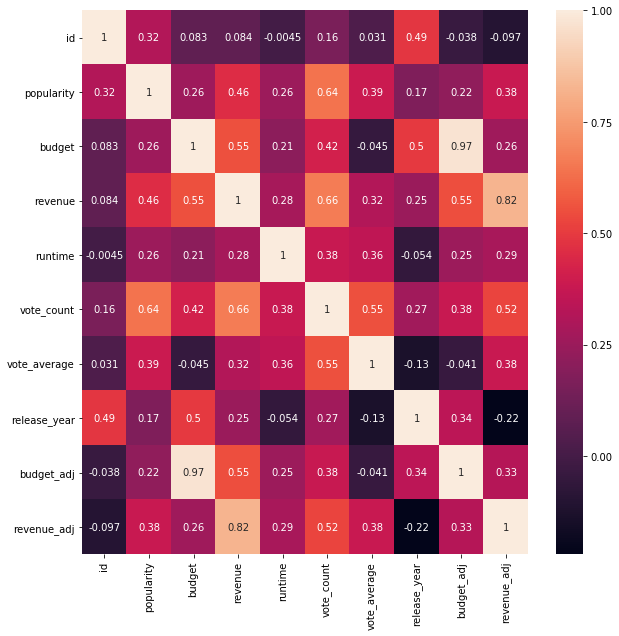

In [80]:
df_trend.shape
corr_matrix = df_trend.corr()
plt.figure(figsize=(10,10))
heat_map = sns.heatmap(corr_matrix, annot=True)
bottom, top = heat_map.get_ylim()
heat_map.set_ylim(bottom + 0.5, top - 0.5);

Isolating the popularity and release year columns to analyze popularity trends over time.

In [81]:
df_poptrend=df_trend[['popularity', 'release_year']]
df_poptrend

,popularity,release_year
9849,3.170651,1962
10438,2.508235,1963
9881,3.153791,1964
10689,1.910465,1965
10401,1.554808,1967
...,...,...
91,1.904898,2015
95,1.841779,2015
129,1.291013,2015
19,5.476958,2015


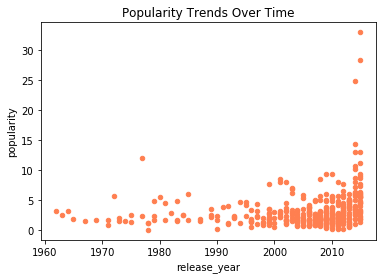

In [82]:
df_poptrend.plot(title="Popularity Trends Over Time",x="release_year",y="popularity",kind="scatter", c="coral");


To find average popularity of each release year of high revenue movies

In [83]:
from numpy.polynomial.polynomial import polyfit

In [84]:
b, m=polyfit(df_poptrend.release_year,df_poptrend.popularity, 1)
best_fit_y=(m*df_poptrend.release_year)+b

To view best fit line better, y limit was set to 15 on the graph to block out outliers. The red dashed line represents the best fit line for the dataset.

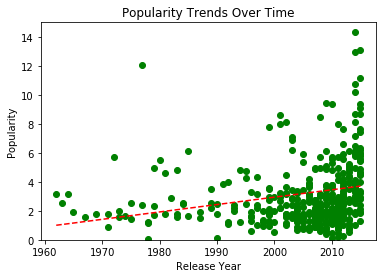

In [85]:
plt.title('Popularity Trends Over Time')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.ylim(top=15)
plt.scatter(df_poptrend.release_year,df_poptrend.popularity,c='green')
plt.plot(df_poptrend.release_year,best_fit_y,'--',color='red');

<a id='conclusions'></a>
## Conclusions



### Results:
The data suggests the following:
    1. There is not a significant correlation between popularity and revenue.
    2. There was more data to base off of due to higher amount of popularity ratings over time.
    3. There is not big correlation between runtime of movies and budget. 
    4. There is, however, a higher correlation between budget and revenue.
    
### Limitations:
A few limitations exist within the data: 
    1. Some correlations provided in the correlation matrix are limited due to differing variable types. 
    2. There is not a lot of data from previous years prior to the 2000s to draw a more accurate conclusion from regarding popularity trends over time. 
   